<a href="https://colab.research.google.com/github/LestyMV/Final-assignment---CO2-emissions/blob/main/Final_assignment_CO2_emissions_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.** What is the biggest predictor of a large CO2 output per capita of a country?

To determine this you may want to consider things like GDP per capita, diets, number of cars per capita, various energy source, mobility and other factors.
Your answer can also be a specific combination of certain factors.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly


In [ ]:
# Make a usable dataframe of all dataframes
base_url = 'https://raw.githubusercontent.com/LestyMV/Final-assignment---CO2-emissions/main/'

# Import urls
url_co2 = f'{base_url}annual-co-emissions-by-region.csv'
url_gdp = f'{base_url}gdp-per-capita-maddison-2020.csv'
url_food = f'{base_url}global-food.csv'
url_pov = f'{base_url}the-share-and-number-of-people-living-in-extreme-poverty.csv'
url_hdi = f'{base_url}human-development-index.csv'
url_energy = f'{base_url}energy-consumption-by-source-and-country.csv'
url_pop_dens = f'{base_url}population-density-vs-prosperity.csv'
url_agri_land = f'{base_url}share-of-land-area-used-for-agriculture.csv'
url_industry = f'{base_url}industry-share-of-total-emplyoment.csv'
url_urban_rural = f'{base_url}urban-and-rural-population.csv'
url_gini =  f'{base_url}economic-inequality-gini-index.csv'
url_agri_out = f'{base_url}agricultural-output-dollars.csv'
url_gni = f'{base_url}gross-national-income-per-capita.csv'
url_energy_price = f'{base_url}levelized-cost-of-energy.csv'



In [ ]:
# Read urls
df_co2 = pd.read_csv(url_co2)
df_gdp = pd.read_csv(url_gdp)
df_food = pd.read_csv(url_food)
df_pov = pd.read_csv(url_pov)
df_hdi = pd.read_csv(url_hdi)
df_energy = pd.read_csv(url_energy)
df_density = pd.read_csv(url_pop_dens)
df_agri_land = pd.read_csv(url_agri_land)
df_industry = pd.read_csv(url_industry)
df_urban_rural = pd.read_csv(url_urban_rural)
df_gini = pd.read_csv(url_gini)
df_agri_out = pd.read_csv(url_agri_out)
df_gni = pd.read_csv(url_gni)
df_energy_price = pd.read_csv(url_energy_price)

In [ ]:
# Rename columns
df_co2 = df_co2.rename(columns = {'Entity':'Country', 
                                  'Annual CO₂ emissions (zero filled)': 'Annual CO₂ emissions (t/py)'})
df_gdp = df_gdp.rename(columns = {'Entity':'Country', 
                                  'GDP per capita': 'GDP pc'})
df_food = df_food.rename(columns = {'Food supply (kcal per capita per day)': 'Food supply (kcal/pc/pd)'})
df_pov = df_pov.rename(columns = {'Entity':'Country', 
                                  '$2.15 a day - share of population below poverty line': 'Share of pop < poverty line'})
df_hdi = df_hdi.rename(columns = {'Entity':'Country', 
                                  'Human Development Index': 'HDI'})
df_energy = df_energy.rename(columns = {'Entity':'Country', 
                                        'Geo Biomass Other - TWh (zero filled)': 'Biomass TWh', 
                                        'Biofuels Consumption - TWh - Total (zero filled)': 'Biofuels TWh', 
                                        'Solar Consumption - TWh (zero filled)': 'Solar TWh', 
                                        'Wind Consumption - TWh (zero filled)': 'Wind TWh', 
                                        'Hydro Consumption - TWh (zero filled)': 'Hydro TWh', 
                                        'Nuclear Consumption - TWh (zero filled)': 'Nuclear TWh', 
                                        'Gas Consumption - TWh (zero filled)': 'Gas TWh', 
                                        'Coal Consumption - TWh (zero filled)': 'Coal TWh', 
                                        'Oil Consumption - TWh (zero filled)': 'Oil TWh'})
df_density = df_density.rename(columns = {'Entity':'Country'})
df_agri_land = df_agri_land.rename(columns = {'Entity':'Country'})
df_industry = df_industry.rename(columns = {'Entity':'Country', 
                                            'Industry as % of total employment -- ILO modelled estimates, May 2017': 'Industry (% of total employment)'})
df_urban_rural = df_urban_rural.rename(columns = {'Entity':'Country'})
df_gini = df_gini.rename(columns = {'Entity':'Country', 
                                    'Gini coefficient': 'Gini'})
df_agri_out = df_agri_out.rename(columns = {'Entity':'Country', 
                                            'output_quantity': 'Agri output $'})
df_gni = df_gni.rename(columns = {'Entity':'Country', 
                                  'GNI per capita, PPP (constant 2017 international $)': 'GNI'})
df_energy_price = df_energy_price.rename(columns = {'Bioenergy levelized cost of energy': 'Bioenergy', 
                                                    'Geothermal levelized cost of energy': 'Geothermal energy', 
                                                    'Offshore wind levelized cost of energy': 'Offshore wind power', 
                                                    'Solar photovoltaic levelized cost of energy': 'Solar photovoltaic power', 
                                                    'Concentrated solar power levelized cost of energy': 'Concentrated solar power', 
                                                    'Hydropower levelized cost of energy': 'Hydropower', 
                                                    'Onshore wind levelized cost of energy': 'Onshore wind power'})

In [ ]:
# Recalculate columns
df_urban_rural['Total population'] = df_urban_rural['Urban population'] + df_urban_rural['Rural population']
df_urban_rural['Urban (% of total)'] = df_urban_rural['Urban population'] / df_urban_rural['Total population'] * 100
df_urban_rural['Rural (% of total)'] = df_urban_rural['Rural population'] / df_urban_rural['Total population'] * 100
df_energy['Renewable TWh'] = df_energy['Biomass TWh'] + df_energy['Biofuels TWh'] + df_energy['Solar TWh'] + df_energy['Wind TWh'] + df_energy['Hydro TWh']
df_energy['Fossil TWh'] = df_energy['Gas TWh'] + df_energy['Coal TWh'] + df_energy['Oil TWh']
df_co2['Annual CO₂ emissions (kg/py)'] = df_co2['Annual CO₂ emissions (t/py)'] * 1000

In [ ]:
# Select columns per datafame
df_co2 = df_co2.loc[:, ('Country', 'Year', 'Annual CO₂ emissions (kg/py)','Annual CO₂ emissions (t/py)')]
df_gdp = df_gdp.loc[:, ('Country', 'Year', 'GDP pc')]
df_food = df_food.loc[:, ('Country', 'Year', 'Population', 'Food supply (kcal/pc/pd)')]
df_pov = df_pov.loc[:, ('Country', 'Year', 'Share of pop < poverty line')]
df_hdi = df_hdi.loc[:, ('Country', 'Year', 'HDI')]
df_energy = df_energy.loc[:, ('Country', 'Year', 'Renewable TWh', 'Nuclear TWh', 'Fossil TWh')]
df_density = df_density.loc[:, ('Country', 'Year', 'Population density')]
df_agri_land = df_agri_land.loc[:, ('Country', 'Year', 'Agricultural land (% of land area)')]
df_industry = df_industry.loc[:, ('Country', 'Year', 'Industry (% of total employment)')]
df_urban_rural = df_urban_rural.loc[:, ('Country', 'Year', 'Urban (% of total)', 'Rural (% of total)')]
df_gini = df_gini.loc[:, ('Country', 'Year', 'Gini')]
df_agri_out = df_agri_out.loc[:, ('Country', 'Year', 'Agri output $')]
df_gni = df_gni.loc[:, ('Country', 'Year', 'GNI')]

# Merge all dataframes into one dataframe
df_list = [df_co2, df_gdp, df_food, df_pov, df_hdi, df_energy, df_density, df_agri_land, df_industry, df_urban_rural, df_gini, df_agri_out, df_gni]
df_total = df_list[0]
for df_ in df_list[1:]:
    df_total = df_total.merge(df_, on=['Country', 'Year'])

In [ ]:
# Calculate total CO2 emissions in kg and energy use in kWh per capita
df_total['Annual CO₂ emissions (kg/py/pc)'] = df_total['Annual CO₂ emissions (kg/py)'] / df_total['Population']
df_total['Renewable kWh/pc'] = (df_total['Renewable TWh'] * 1000000000) / df_total['Population']
df_total['Nuclear kWh/pc'] = (df_total['Nuclear TWh'] * 1000000000) / df_total['Population']
df_total['Fossil kWh/pc'] = (df_total['Fossil TWh'] * 1000000000) / df_total['Population']
print('Dataframe of all data in csv files after renaming and recalculating')
display(df_total)

Dataframe of all data in csv files after renaming and recalculating


,Country,Year,Annual CO₂ emissions (kg/py),Annual CO₂ emissions (t/py),GDP pc,Population,Food supply (kcal/pc/pd),Share of pop < poverty line,HDI,Renewable TWh,...,Industry (% of total employment),Urban (% of total),Rural (% of total),Gini,Agri output $,GNI,Annual CO₂ emissions (kg/py/pc),Renewable kWh/pc,Nuclear kWh/pc,Fossil kWh/pc
0,Algeria,1995,9.498142e+10,94981416.0,5142.3840,28478024,2866.8518,5.770566,0.606,0.570699,...,24.981,55.997002,44.002998,0.353301,5409323000,7662.601562,3335.253036,20.039975,0.0,10975.976774
1,Algeria,2011,1.198075e+11,119807544.0,13204.0000,36543548,3360.7670,0.455468,0.727,1.092755,...,32.683,68.236000,31.764000,0.276157,11693222000,10945.424805,3278.486916,29.902806,0.0,12680.639001
2,Austria,1994,6.104576e+10,61045756.0,28780.7600,7935366,3558.1807,0.248399,0.845,106.873701,...,32.400,61.869997,38.130003,0.313223,5910898000,39418.027344,7692.872137,13468.024197,0.0,30300.045392
3,Austria,1995,6.402307e+10,64023070.0,29621.6820,7947293,3526.6536,0.994032,0.849,111.601714,...,32.148,61.595996,38.404004,0.310593,5711302000,40264.308594,8055.959432,14042.733008,0.0,31628.080404
4,Austria,1997,6.726359e+10,67263590.0,31173.0490,7967086,3514.5742,0.209078,0.857,108.691781,...,29.687,61.045005,38.954995,0.302299,5862796000,41935.753906,8442.684063,13642.601722,0.0,32988.869456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,Vietnam,2008,1.133269e+11,113326890.0,4200.2354,85597230,2669.1277,11.139827,0.653,73.076328,...,20.837,29.128001,70.871999,0.355703,45186164000,4521.796875,1323.955109,853.723044,0.0,4486.262932
894,Vietnam,2010,1.385851e+11,138585140.0,4571.8486,87411016,2744.3765,2.870482,0.663,79.355967,...,21.270,30.417000,69.583000,0.392527,47459531000,4922.812500,1585.442503,907.848585,0.0,5271.059771
895,Vietnam,2012,1.443730e+11,144373020.0,4984.0000,89301330,2831.7880,1.660162,0.672,146.344643,...,21.100,31.752001,68.247999,0.356459,53059567000,5371.786133,1616.695070,1638.773390,0.0,5372.454139
896,Vietnam,2014,1.838250e+11,183824960.0,5455.0000,91235500,2853.8894,1.912046,0.680,168.674612,...,21.446,33.115000,66.885000,0.347554,57302279000,5830.685547,2014.840276,1848.782683,0.0,6168.360452


In [ ]:
# List all columns in dataframe and choose which ones to show in new dataframe
column_list_total = list(df_total.columns.values)
# print(column_list_total)
df_plot = df_total.loc[:, ('Country', 
                           'Year', 
                           'Annual CO₂ emissions (kg/py/pc)', 
                           'Population', 
                           'Population density', 
                           'Urban (% of total)', 
                           'Rural (% of total)', 
                           'GDP pc', 
                           'GNI', 
                           'Gini', 
                           'HDI', 
                           'Share of pop < poverty line', 
                           'Industry (% of total employment)', 
                           'Renewable kWh/pc', 
                           'Nuclear kWh/pc', 
                           'Fossil kWh/pc', 
                           'Agri output $', 
                           'Food supply (kcal/pc/pd)', 
                           'Agricultural land (% of land area)')]

In [ ]:
# Check how many unique countries are in the dataframe
count_countries = df_plot.Country.unique().size
print(f'The number of unique countries in df_plot is: {count_countries}')
# Check how many unique years are in the dataframe
count_years = df_plot.Year.unique().size
print(f'The number of available years in df_plot is: {count_years}')
# Check for missing values in df_plot (there were no missing values in the dataframe)
# and the Pandas method of calculate the Pearson correlation coefficient excludes NA/null values.
nan_count_plot = df_plot.isna().sum()
print(f'The number of missing values in df_plot is: {nan_count_plot}')
print('\n')
print('Dataframe with relevant values for analysis of question 1 (df_plot)')
#display(df_plot)


The number of unique countries in df_plot is: 64
The number of available years in df_plot is: 27
The number of missing values in df_plot is: Country                               0
Year                                  0
Annual CO₂ emissions (kg/py/pc)       0
Population                            0
Population density                    0
Urban (% of total)                    0
Rural (% of total)                    0
GDP pc                                0
GNI                                   0
Gini                                  0
HDI                                   0
Share of pop < poverty line           0
Industry (% of total employment)      0
Renewable kWh/pc                      0
Nuclear kWh/pc                        0
Fossil kWh/pc                         0
Agri output $                         0
Food supply (kcal/pc/pd)              0
Agricultural land (% of land area)    0
dtype: int64


Dataframe with relevant values for analysis of question 1 (df_plot)


In [ ]:
# Make dataframe with correlation values between all variables and Annual CO2 emissions (kg/py/pc)
df_plot_corr = df_plot.corr()
df_plot_corr = df_plot_corr.sort_values('Annual CO₂ emissions (kg/py/pc)')
df_plot_corr = df_plot_corr.reset_index()
df_plot_corr = df_plot_corr.drop([4, 17]) # Drop rows for Year and Annual CO2 emissions 
df_plot_corr = df_plot_corr.drop(columns=['Year', 
                                          'Population', 
                                          'Population density', 
                                          'Urban (% of total)', 
                                          'Rural (% of total)', 
                                          'GDP pc', 
                                          'GNI', 
                                          'Gini', 
                                          'HDI', 
                                          'Share of pop < poverty line', 
                                          'Industry (% of total employment)', 
                                          'Renewable kWh/pc', 
                                          'Nuclear kWh/pc', 
                                          'Fossil kWh/pc', 
                                          'Agri output $', 
                                          'Food supply (kcal/pc/pd)', 
                                          'Agricultural land (% of land area)']) # To keep the column for Annual CO2 emissions only

<ipython-input-12-11b674226afa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_plot_corr = df_plot.corr()


In [ ]:
df_plot_corr = df_plot_corr.rename(columns = {'index':'Variable', 
                                              'Annual CO₂ emissions (kg/py/pc)': 'Correlation coefficient between variable and Annual CO₂ emissions (kg/py/pc)'})

In [ ]:
#@title Default title text
print('\n')
print('Dataframe of correlation coefficients (df_plot_corr)')
display(df_plot_corr)
print('\n')



Dataframe of correlation coefficients (df_plot_corr)


,Variable,Correlation coefficient between variable and Annual CO₂ emissions (kg/py/pc)
0,Share of pop < poverty line,-0.448071
1,Rural (% of total),-0.417690
2,Gini,-0.322609
3,Population,-0.049650
5,Population density,-0.038160
6,Industry (% of total employment),0.053035
7,Agricultural land (% of land area),0.078350
8,Agri output $,0.095496
9,Renewable kWh/pc,0.107329
10,Nuclear kWh/pc,0.214055


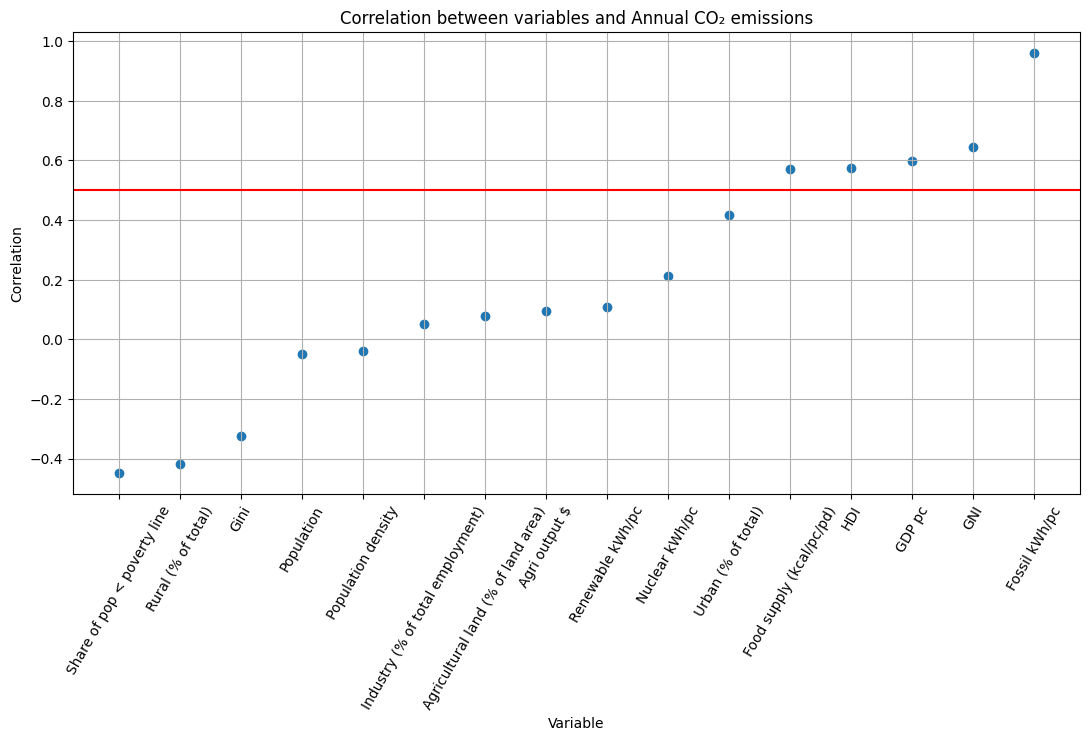

In [ ]:
# Make plot of the correlation between 'Annual CO₂ emissions (kg/py/pc)' and all variables
plt.figure(figsize=(13, 6))
plt.scatter(x = df_plot_corr['Variable'], y = df_plot_corr['Correlation coefficient between variable and Annual CO₂ emissions (kg/py/pc)'])
plt.xticks(rotation=60)
plt.grid()
plt.axhline(0.5, color='red')
plt.xlabel('Variable')
plt.ylabel('Correlation')
plt.title(f'Correlation between variables and Annual CO₂ emissions')
plt.show()
print('\n')

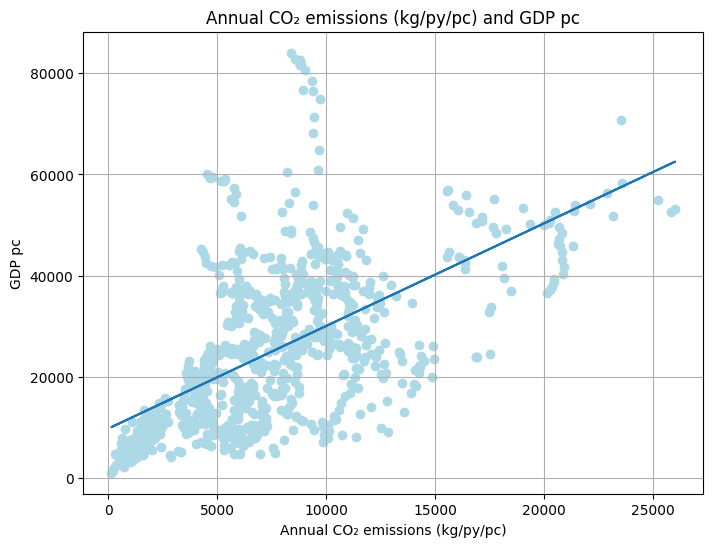

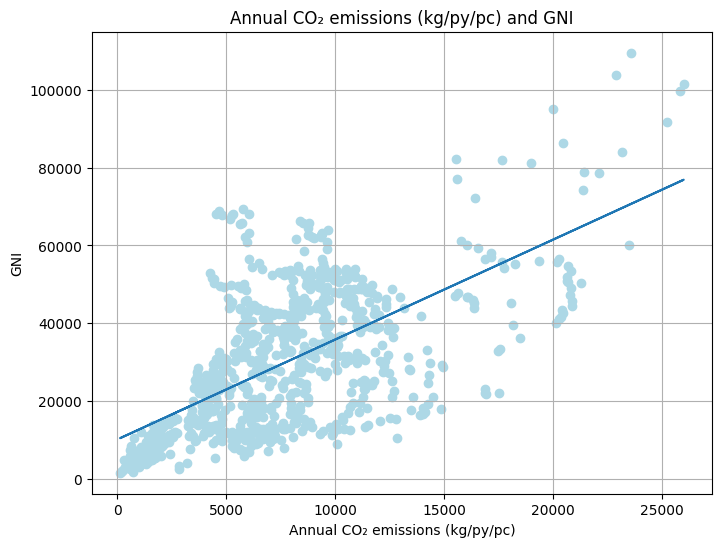

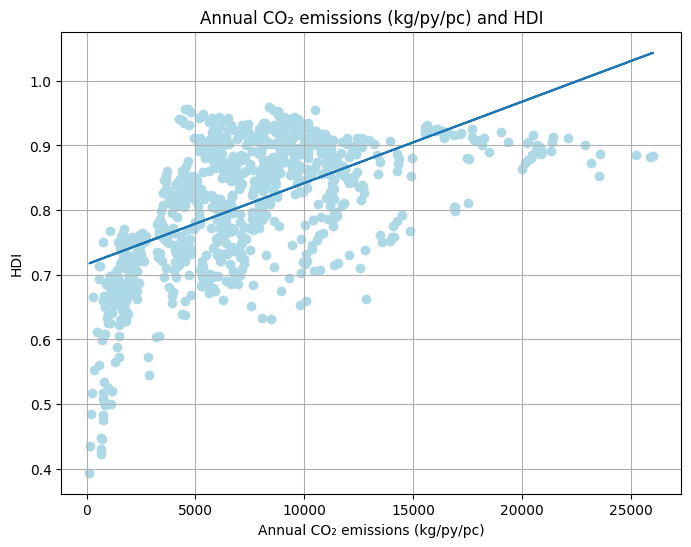

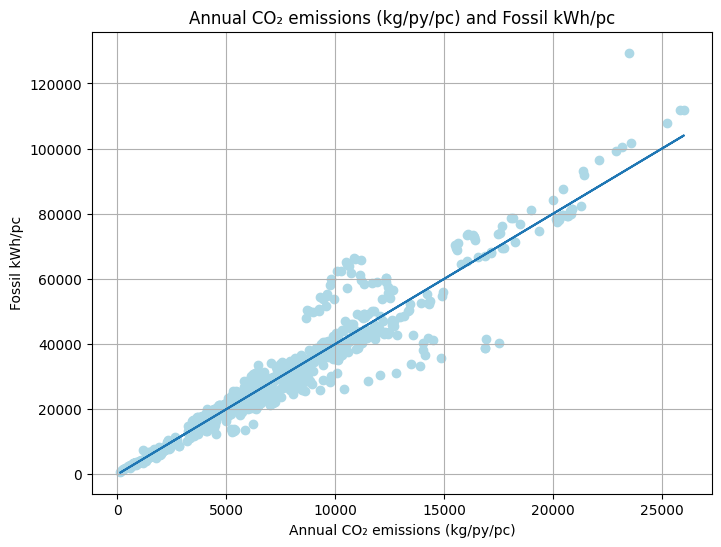

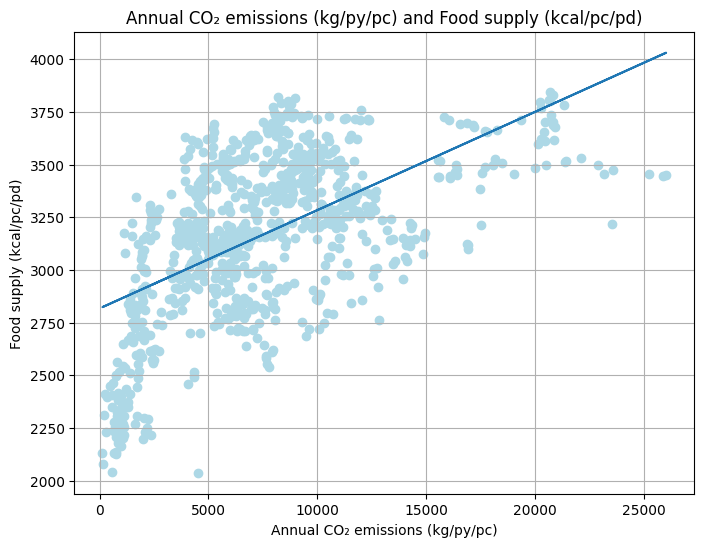



********************************************************************************
End of question N1
********************************************************************************


In [ ]:
# Make plots for every column with a linear regression line for the variables with moderate to high correlation
column_list_plot = ['GDP pc', 'GNI', 'HDI', 'Fossil kWh/pc', 'Food supply (kcal/pc/pd)']
def make_scatterplot():
  for column in column_list_plot:
      fig, ax = plt.subplots()
      x = df_plot['Annual CO₂ emissions (kg/py/pc)']
      y = df_plot[column]
      plt.scatter(x, y, color = 'lightblue')

      try:
        coefs = poly.polyfit(x, y, 1)
        ffit = poly.polyval(x, coefs)
        plt.plot(x, ffit)
      except ValueError as error:
        print(f'Could not plot linear regression line because:{error}')
      print('\n')

      plt.xlabel('Annual CO₂ emissions (kg/py/pc)')
      plt.ylabel(column)
      plt.title(f'Annual CO₂ emissions (kg/py/pc) and {column}')
      plt.grid()
      fig.set_size_inches(8, 6)
      plt.show()

make_scatterplot()


def print_separator(sep, num, msg):
  print("\n")
  print(sep * num)
  print(f"{msg}")
  print(sep * num)

long_separator_amount = 80
print_separator("*", long_separator_amount, f"End of question N1")